In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wordcloud

# Carregando Dados

In [2]:
df_shoes = pd.read_csv('netshoes/netshoes/netshoes.csv').drop_duplicates()
print(df_shoes.columns)
print(df_shoes.shape)
df_shoes.head()

Index(['brand', 'category', 'colors', 'customer_recommendation_rate',
       'customer_reviews_number', 'customer_score', 'description', 'gender',
       'image_urls', 'images', 'material', 'name', 'nationality', 'price',
       'raw_name', 'tags', 'url', 'usage_type'],
      dtype='object')
(8064, 18)


,brand,category,colors,customer_recommendation_rate,customer_reviews_number,customer_score,description,gender,image_urls,images,material,name,nationality,price,raw_name,tags,url,usage_type
0,olympikus,caminhada,"rosa,claro",100.0,19,4.79,O Tênis Olympikus Mystic tem cabedal com tecid...,feminino,https://static.netshoes.com.br/produtos/tenis-...,"D22-2773-D34_zoom1.jpg,D22-2773-D34_zoom2.jpg,...",têxtil e sintético,olympikus mystic,nacional,79.99,tênis olympikus mystic feminino,"rosa,claro,feminino,caminhada,dia a dia,têxtil...",https://www.netshoes.com.br/tenis-olympikus-my...,dia a dia
1,olympikus,caminhada,"preto,dourado",96.0,1486,4.55,"Se a caminhada é o seu exercício, Olympikus At...",masculino,https://static.netshoes.com.br/produtos/tenis-...,"D22-1787-120_zoom1.jpg,D22-1787-120_zoom2.jpg,...",sintético,olympikus attract,nacional,79.99,tênis olympikus attract,"preto,dourado,masculino,caminhada,dia a dia,si...",https://www.netshoes.com.br/tenis-olympikus-at...,dia a dia
2,olympikus,caminhada,chumbo,96.0,1487,4.55,"Se a caminhada é o seu exercício, Olympikus At...",masculino,https://static.netshoes.com.br/produtos/tenis-...,"D22-1787-040_zoom1.jpg,D22-1787-040_zoom2.jpg,...",sintético,olympikus attract,nacional,79.99,tênis olympikus attract,"chumbo,masculino,caminhada,dia a dia,sintético...",https://www.netshoes.com.br/tenis-olympikus-at...,dia a dia
3,olympikus,caminhada,"cinza,preto",96.0,1487,4.55,"Se a caminhada é o seu exercício, Olympikus At...",masculino,https://static.netshoes.com.br/produtos/tenis-...,"D22-1787-128_zoom1.jpg,D22-1787-128_zoom2.jpg,...",sintético,olympikus attract,nacional,89.99,tênis olympikus attract,"cinza,preto,masculino,caminhada,dia a dia,sint...",https://www.netshoes.com.br/tenis-olympikus-at...,dia a dia
4,olympikus,caminhada,preto,100.0,19,4.79,O Tênis Olympikus Mystic tem cabedal com tecid...,feminino,https://static.netshoes.com.br/produtos/tenis-...,"D22-2773-006_zoom1.jpg,D22-2773-006_zoom2.jpg,...",têxtil e sintético,olympikus mystic,nacional,79.99,tênis olympikus mystic feminino,"preto,feminino,caminhada,dia a dia,têxtil e si...",https://www.netshoes.com.br/tenis-olympikus-my...,dia a dia


In [3]:
df_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8064 entries, 0 to 20807
Data columns (total 18 columns):
brand                           8058 non-null object
category                        3196 non-null object
colors                          8064 non-null object
customer_recommendation_rate    7933 non-null float64
customer_reviews_number         8064 non-null int64
customer_score                  8064 non-null float64
description                     8029 non-null object
gender                          8064 non-null object
image_urls                      8064 non-null object
images                          8064 non-null object
material                        8064 non-null object
name                            8064 non-null object
nationality                     8064 non-null object
price                           8064 non-null float64
raw_name                        8064 non-null object
tags                            8064 non-null object
url                             8064 non-n

In [4]:
df_shoes.describe()

,customer_recommendation_rate,customer_reviews_number,customer_score,price
count,7933.000000,8064.000000,8064.000000,8064.000000
mean,93.731249,137.141617,4.503371,195.143669
std,9.201566,379.774808,0.476637,117.187496
min,50.000000,1.000000,1.000000,29.900000
25%,92.000000,5.000000,4.360000,109.990000
50%,97.000000,24.000000,4.600000,179.900000
75%,100.000000,92.000000,4.780000,249.990000
max,100.000000,5699.000000,5.000000,1299.990000


# Análise Exploratória
## Unique Values

In [5]:
for column in df_shoes.select_dtypes(exclude=["number"]).columns:
    print(f"{column}:")
    print(f"    {df_shoes[column].nunique()} valores únicos")

brand:
    152 valores únicos
category:
    53 valores únicos
colors:
    447 valores únicos
description:
    2094 valores únicos
gender:
    5 valores únicos
image_urls:
    8045 valores únicos
images:
    8045 valores únicos
material:
    23 valores únicos
name:
    1691 valores únicos
nationality:
    5 valores únicos
raw_name:
    2002 valores únicos
tags:
    6353 valores únicos
url:
    8048 valores únicos
usage_type:
    7 valores únicos


# Análise Exploratória
## Análise Univariada
### Features Categóricas

In [6]:
def plot_value_counts(df,column,kind,rotation=None):
    if(kind == 'barh'):
        plt.figure(figsize=(10,25))
    else:
        plt.figure(figsize=(16,5))
    np.log(df[column].value_counts()).plot(kind=kind,title=f"{column}")
    if(rotation):
        plt.xticks(rotation=rotation)
    plt.show()

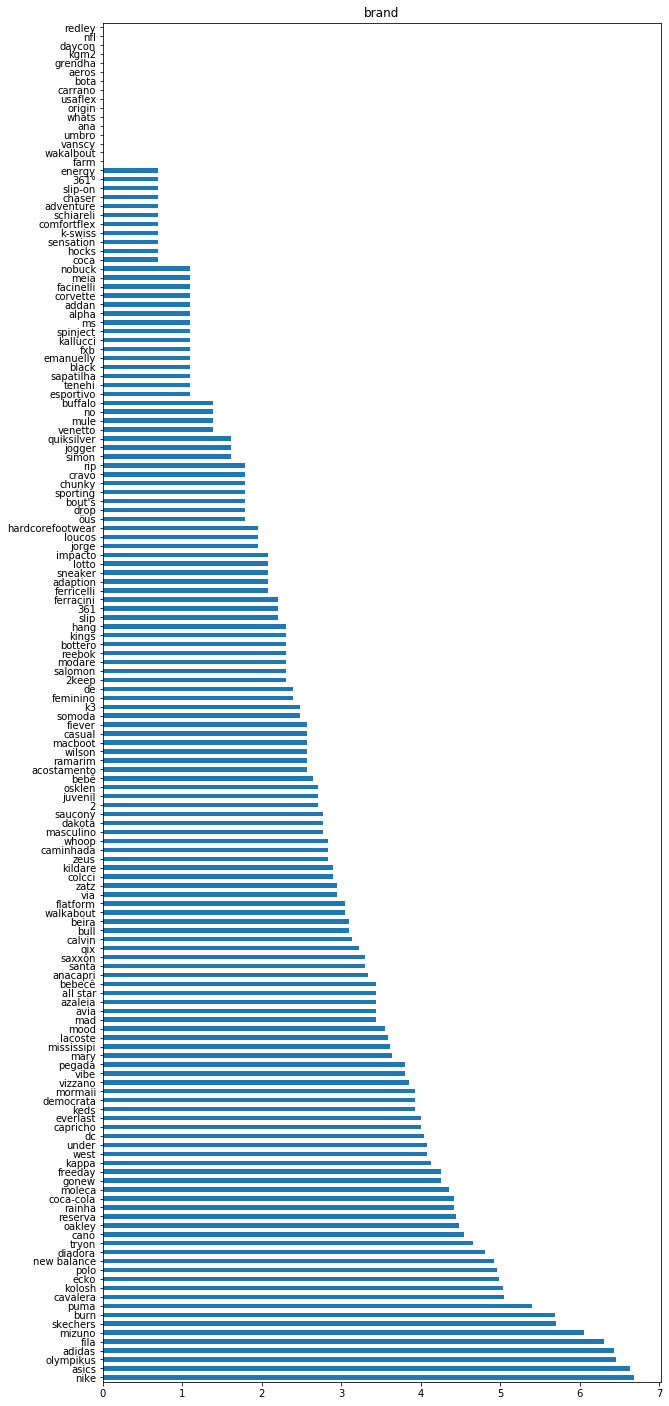

In [7]:
plot_value_counts(df_shoes,'brand','barh')

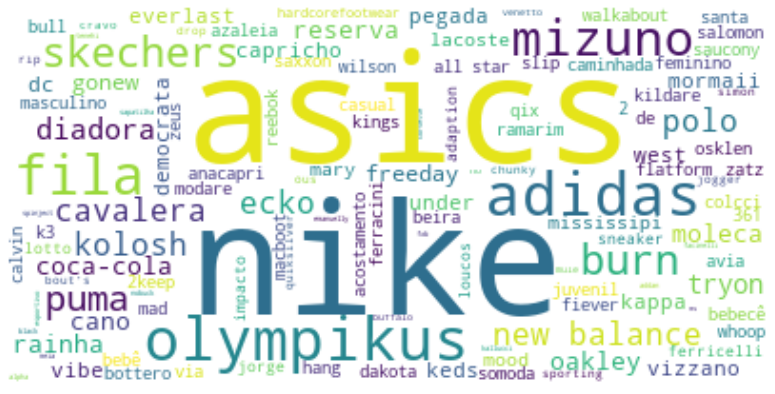

In [83]:
brand_freq = dict(zip(df_shoes['brand'].value_counts().index, df_shoes['brand'].value_counts()))

cloud = wordcloud.WordCloud(background_color="white")
cloud.generate_from_frequencies(frequencies=brand_freq)
plt.figure(figsize=(16,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
old_shape = df_shoes.shape[0]
df_shoes = df_shoes[~df_shoes['raw_name'].str.contains('infantil')]
old_shape - df_shoes.shape[0]

0

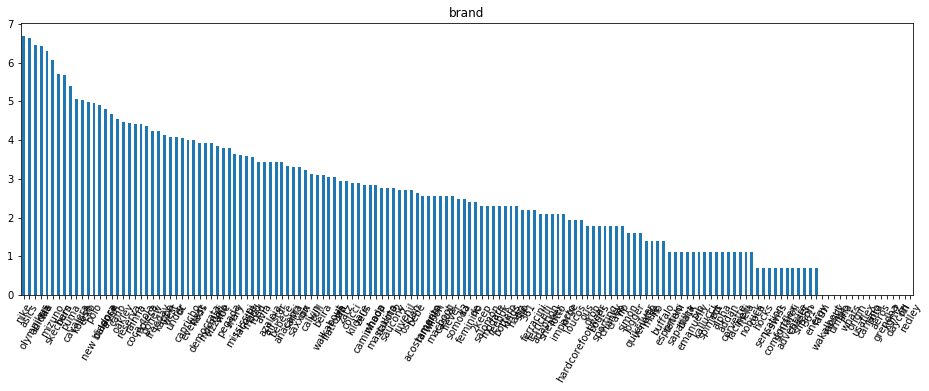

In [9]:
plot_value_counts(df_shoes,'brand','bar',rotation=60)

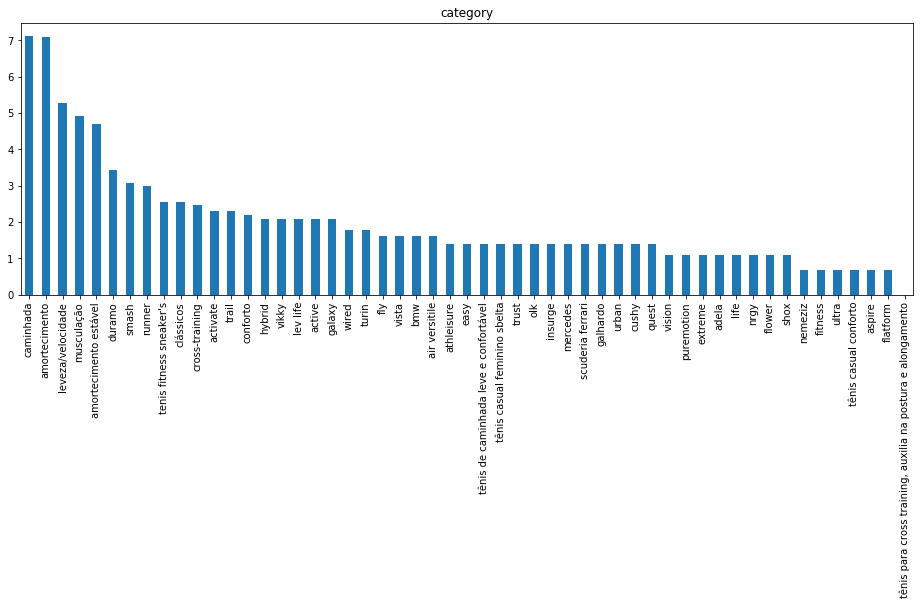

In [10]:
plot_value_counts(df_shoes,'category','bar',rotation=90)

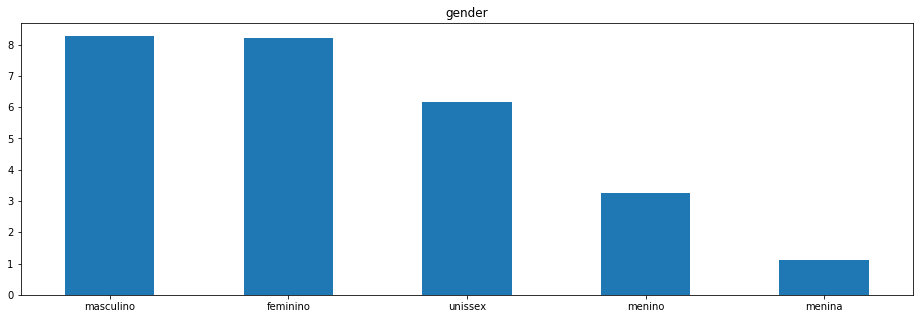

In [11]:
plot_value_counts(df_shoes,'gender','bar',rotation=0.01)

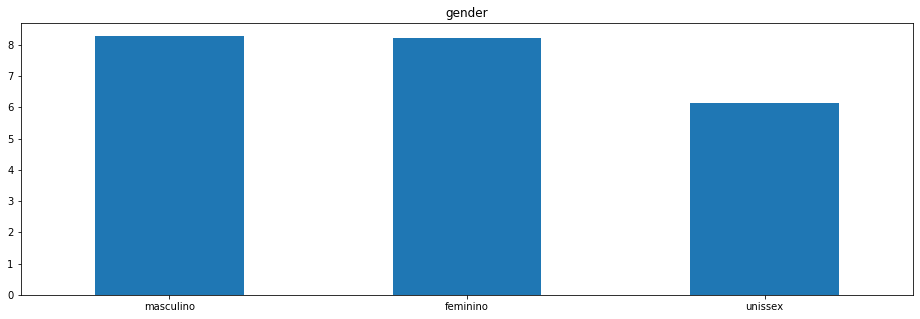

In [12]:
df_shoes.loc[df_shoes['gender']=='menino','gender'] = 'masculino'
df_shoes.loc[df_shoes['gender']=='menina','gender'] = 'feminino'

plot_value_counts(df_shoes,'gender','bar',rotation=0.01)

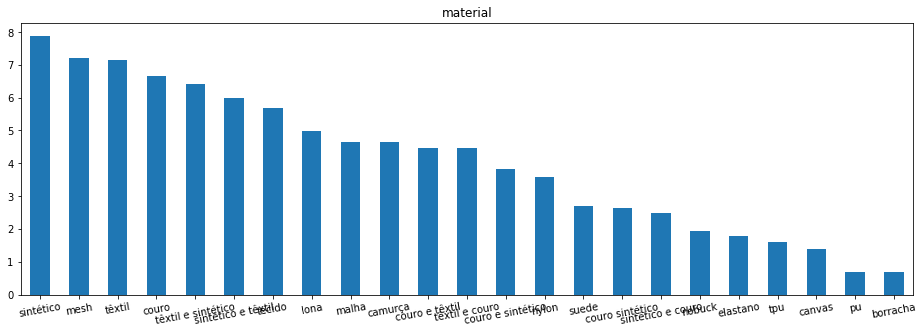

In [13]:
plot_value_counts(df_shoes,'material',kind='bar',rotation=10)

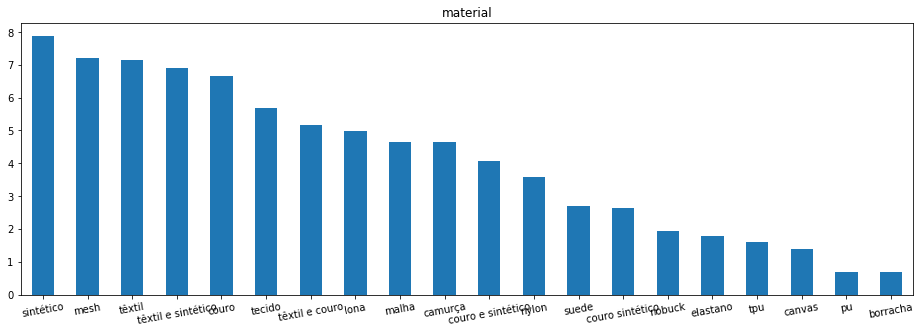

In [14]:
df_shoes.loc[df_shoes['material']=='sintético e couro','material'] = 'couro e sintético'
df_shoes.loc[df_shoes['material']=='sintético e têxtil','material'] = 'têxtil e sintético'
df_shoes.loc[df_shoes['material']=='couro e têxtil','material'] = 'têxtil e couro'

plot_value_counts(df_shoes,'material','bar',rotation=10)

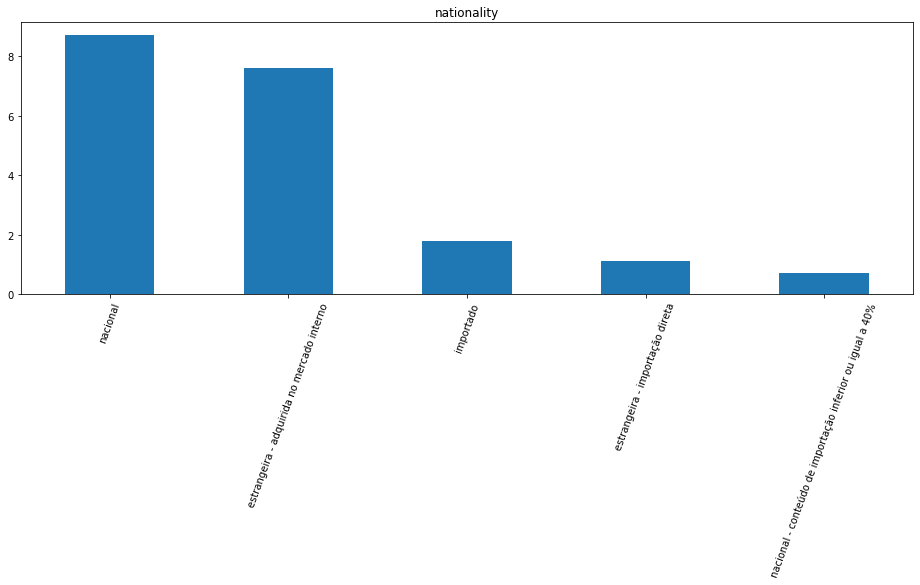

In [15]:
plot_value_counts(df_shoes,'nationality','bar',rotation=70)

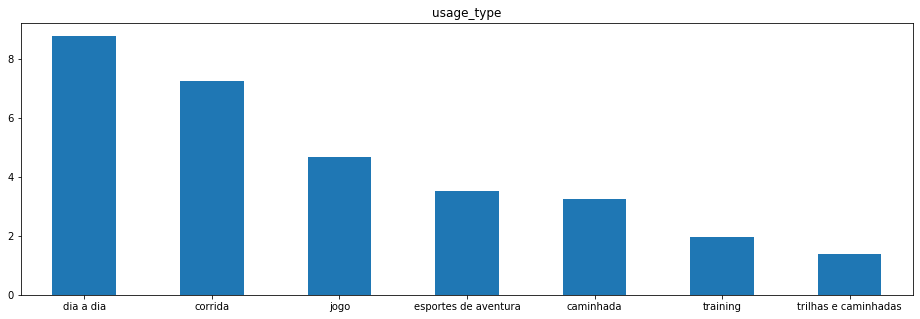

In [16]:
plot_value_counts(df_shoes,'usage_type','bar',rotation=0.01)

## Features numéricas

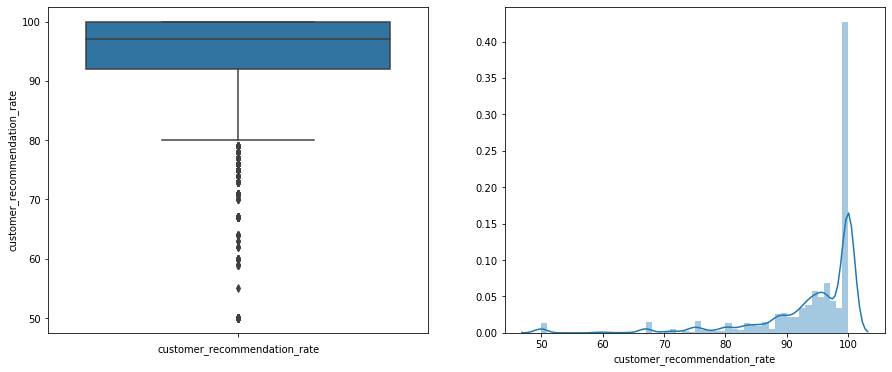

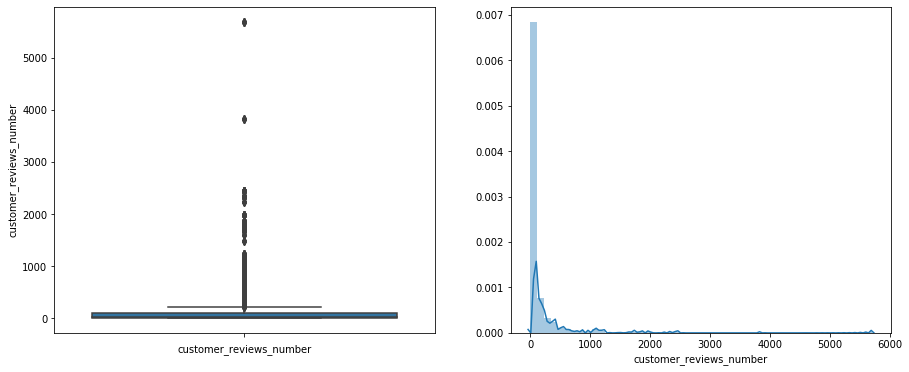

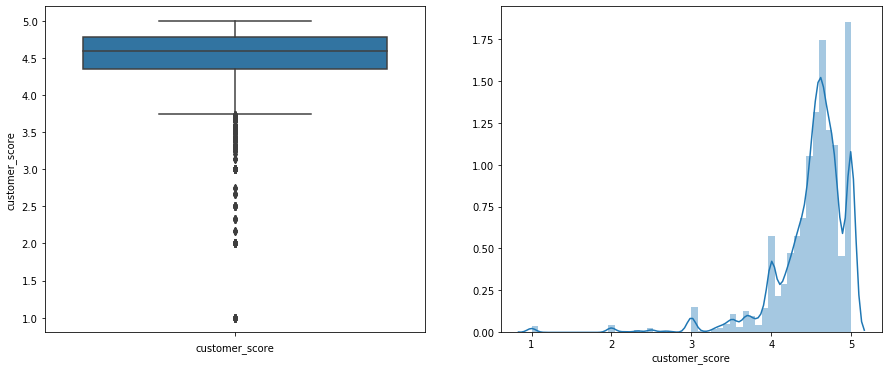

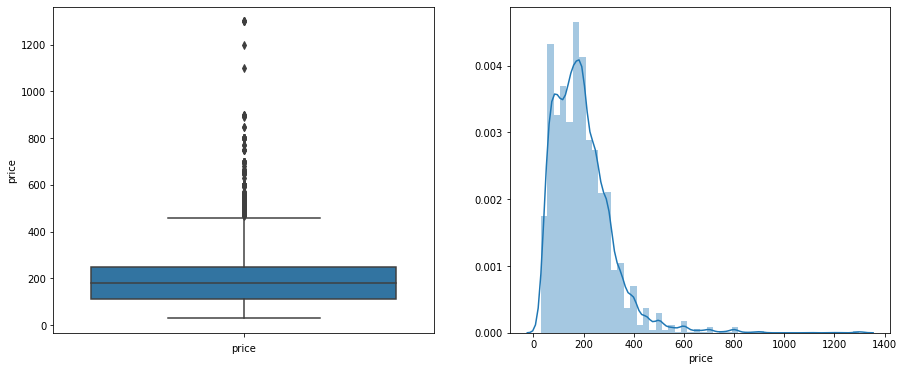

In [17]:
for col in df_shoes.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_shoes[col])
    fig.set_ylabel(col)
    fig.set_xlabel(col)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_shoes[col].dropna())
    fig.set_xlabel(col)

    plt.show()

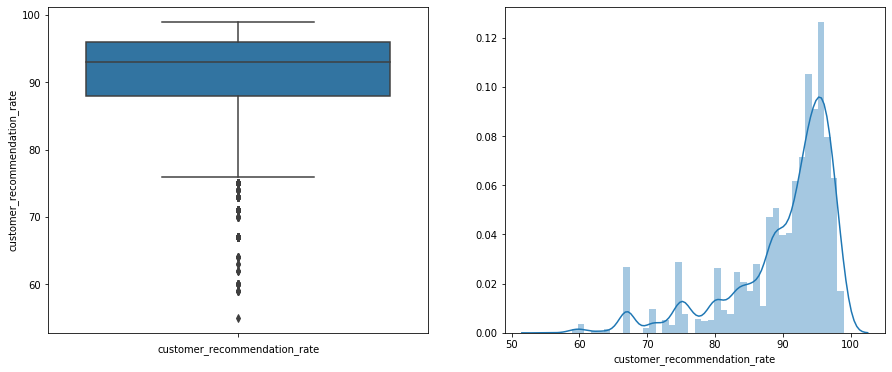

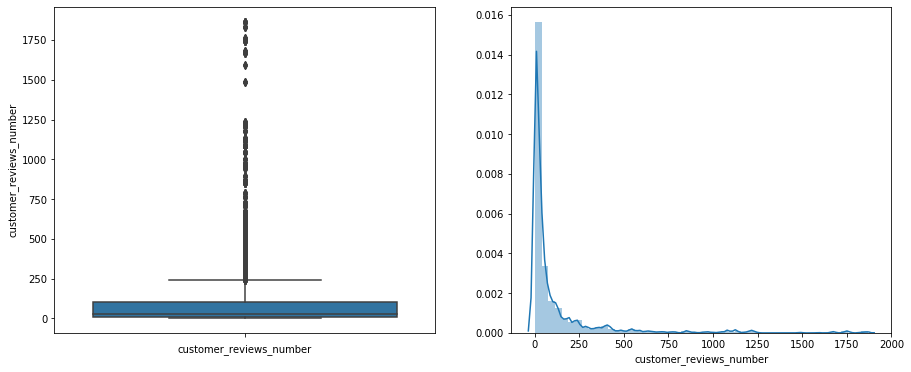

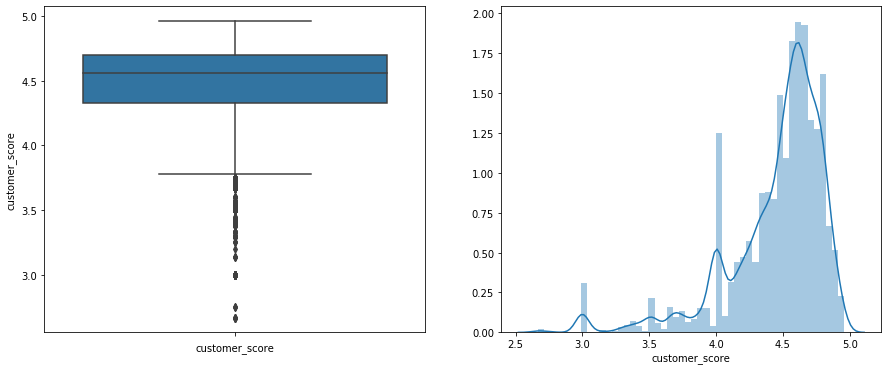

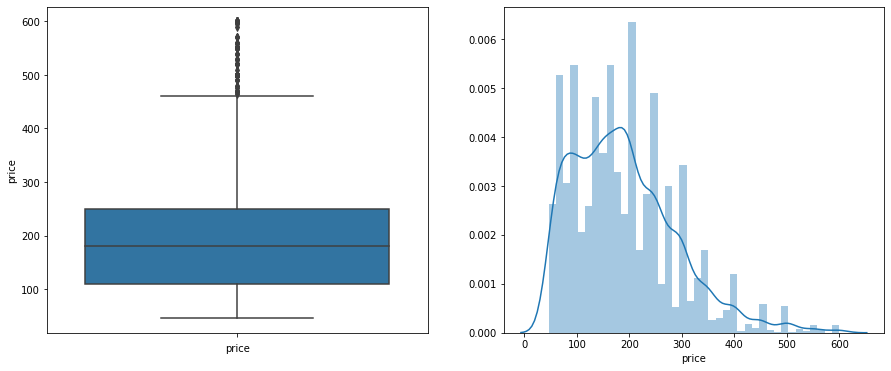

In [18]:
for col in df_shoes.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_shoes[(df_shoes[col] > df_shoes[col].quantile(q=0.01)) &
                               (df_shoes[col] < df_shoes[col].quantile(q=0.99))][col])
        
    fig.set_ylabel(col)
    fig.set_xlabel(col)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_shoes[(df_shoes[col] > df_shoes[col].quantile(q=0.01)) &
                               (df_shoes[col] < df_shoes[col].quantile(q=0.99))][col])
    fig.set_xlabel(col)

    plt.show()

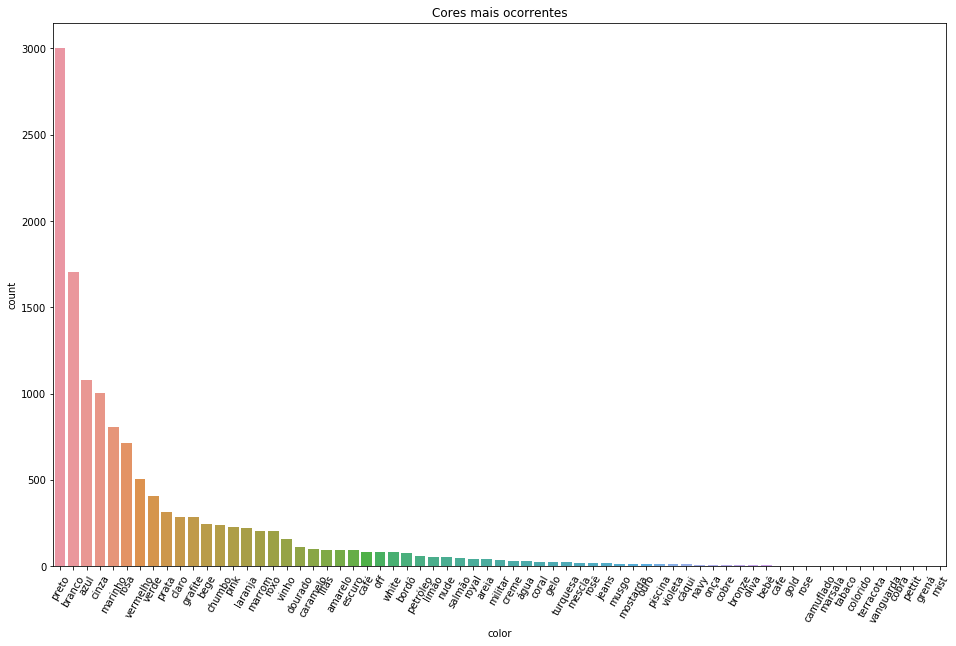

In [19]:
colors = []
[[colors.append(color) for color in row.split(',')] for row in df_shoes['colors'].values]

counts = np.asarray(np.unique(colors,return_counts=True)).T
counts = pd.DataFrame(counts,columns=['color','count'])
counts['count'] = counts['count'].astype(float)
counts = counts.sort_values('count',ascending=False)

plt.figure(figsize=(16,10))
sns.barplot(x='color',y='count',data=counts)
plt.title("Cores mais ocorrentes")
plt.xticks(rotation=60)
plt.show()

In [20]:
print(f"Cada modelo de tênis possui em média {round(df_shoes.groupby('name')['name'].count().mean())} cores diferentes") 

Cada modelo de tênis possui em média 5 cores diferentes


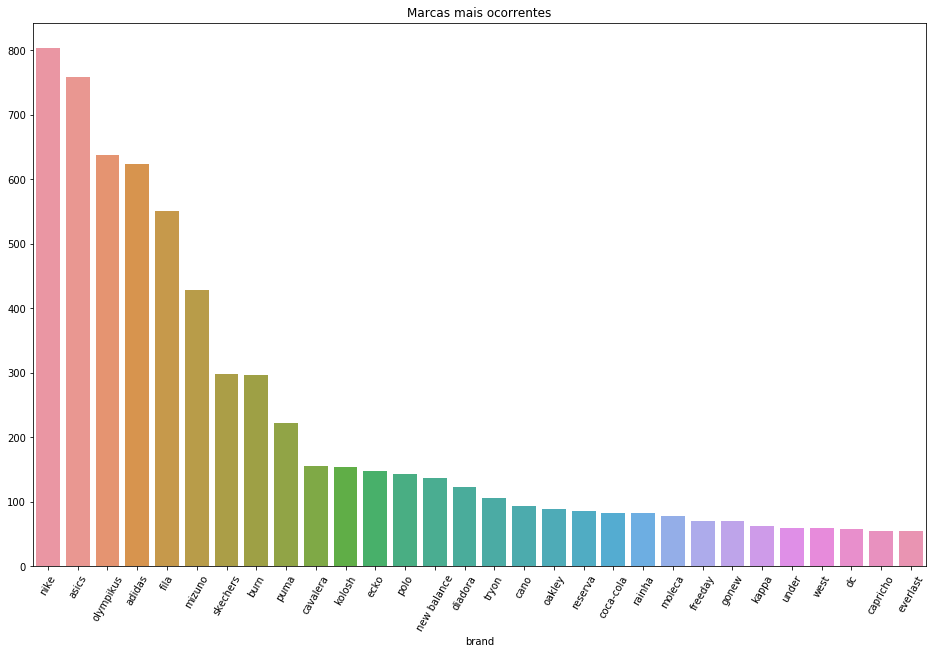

In [21]:
largest_brands = df_shoes.groupby(['brand'])['brand'].count().nlargest(30)
plt.figure(figsize=(16,10))
plt.xticks(rotation=60)
plt.title("Marcas mais ocorrentes")
sns.barplot(x=largest_brands.index,y=largest_brands.values)
plt.show()

## Análise Bivariada

In [22]:
df_shoes.columns

Index(['brand', 'category', 'colors', 'customer_recommendation_rate',
       'customer_reviews_number', 'customer_score', 'description', 'gender',
       'image_urls', 'images', 'material', 'name', 'nationality', 'price',
       'raw_name', 'tags', 'url', 'usage_type'],
      dtype='object')

In [23]:
def plot_ordered_by_y(x,y,data,rotation=50,ascending=False,title=None):
    ordered_axis = (data.groupby([x]).
                 agg({y : 'mean'}).
                 reset_index().sort_values(y,ascending=ascending)[x].values)

    sns.catplot(y=y,x=x,data=data, kind='bar', aspect=2,
                order=ordered_axis)
    plt.xticks(rotation=rotation)
    title = title if title else f"{x.upper()} X {y.upper()}"
    plt.title(title)
    plt.show()

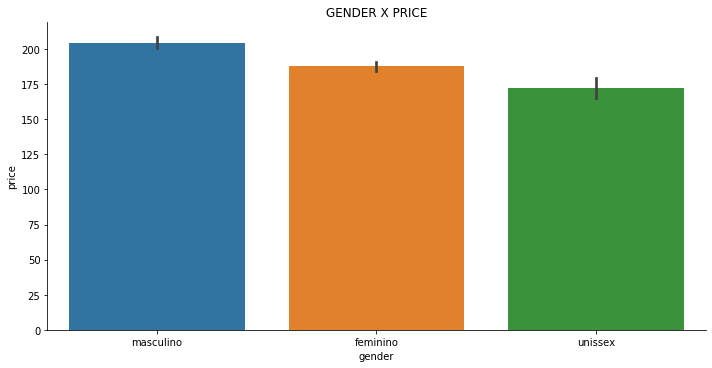

In [24]:
plot_ordered_by_y('gender','price',df_shoes,rotation=0.01)

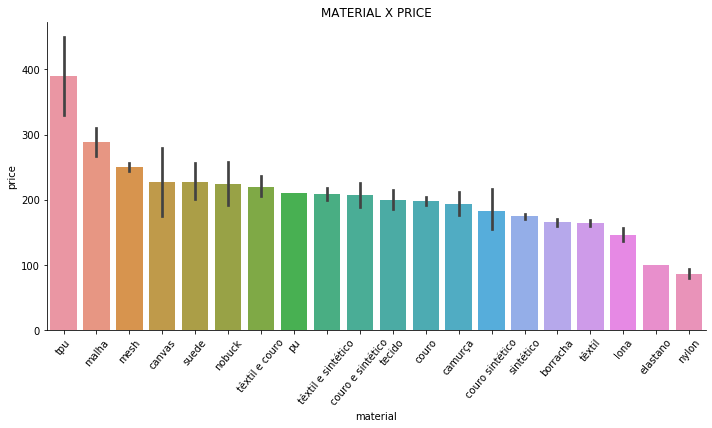

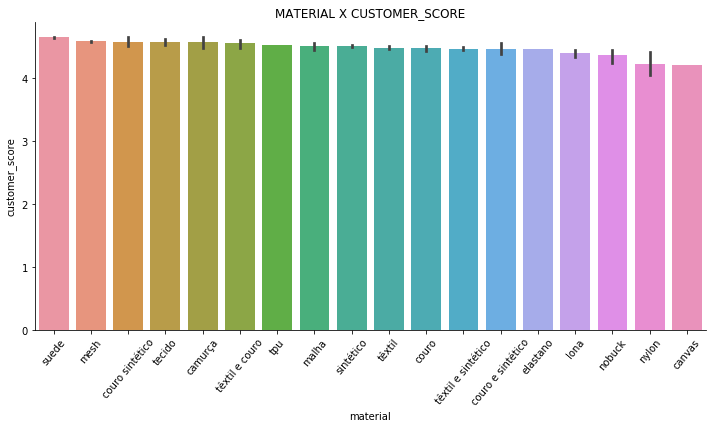

In [25]:
plot_ordered_by_y('material','price',df_shoes)

plot_ordered_by_y('material','customer_score',df_shoes[df_shoes['customer_reviews_number'] > 
                                                       df_shoes['customer_reviews_number'].quantile(0.1)])

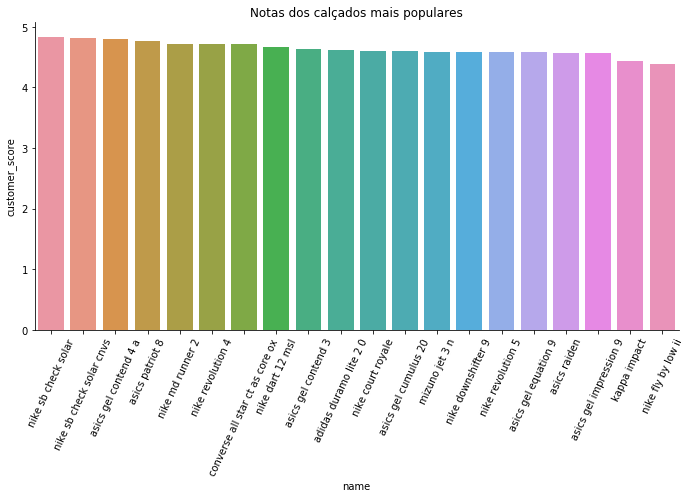

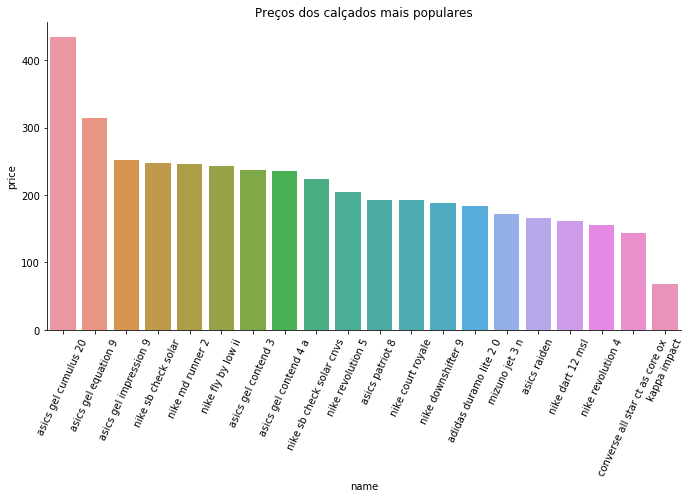

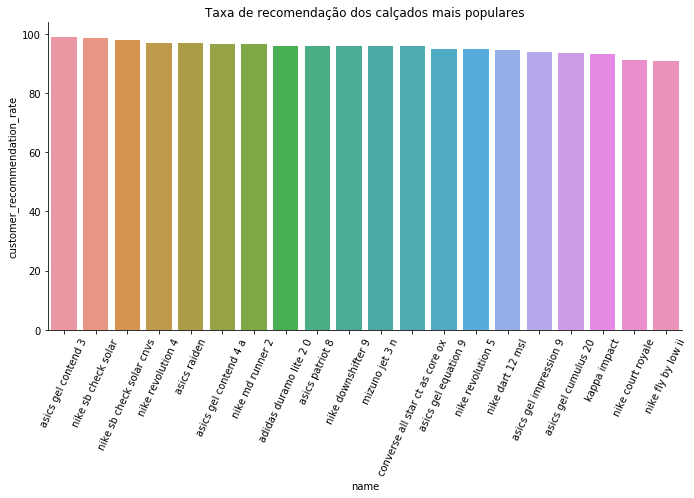

In [26]:
groupby_name_score = df_shoes.groupby('name').agg({'customer_score' : 'mean', 'customer_reviews_number' : 'sum',
                                                   'customer_recommendation_rate' : 'mean',
                                                   'price' : 'mean'}).reset_index()
plot_ordered_by_y('name','customer_score',
                  groupby_name_score.nlargest(20,'customer_reviews_number'),
                  rotation=65, title="Notas dos calçados mais populares")

plot_ordered_by_y('name','price',
                  groupby_name_score.nlargest(20,'customer_reviews_number'),
                  rotation=65, title="Preços dos calçados mais populares")

plot_ordered_by_y('name','customer_recommendation_rate',
                  groupby_name_score.nlargest(20,'customer_reviews_number'),
                  rotation=65,title="Taxa de recomendação dos calçados mais populares")

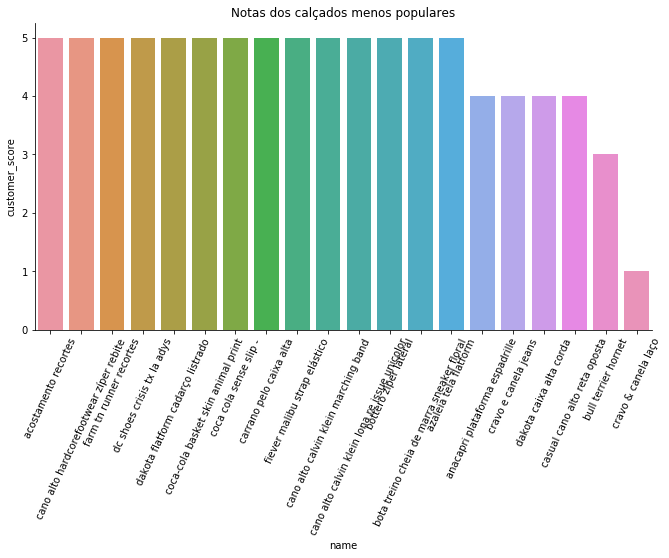

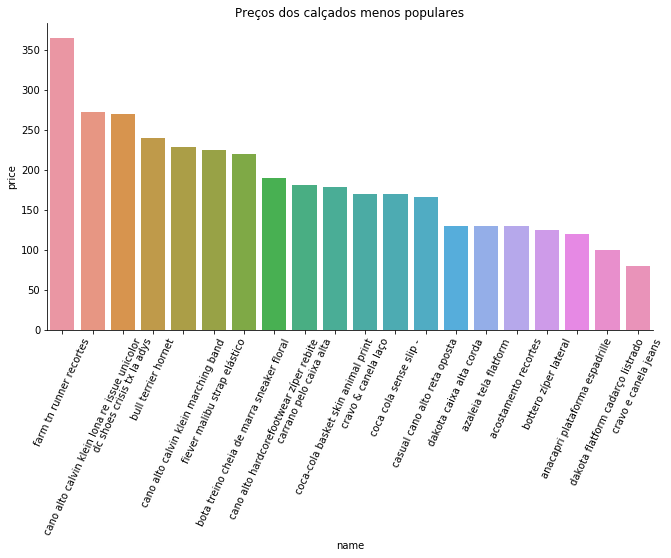

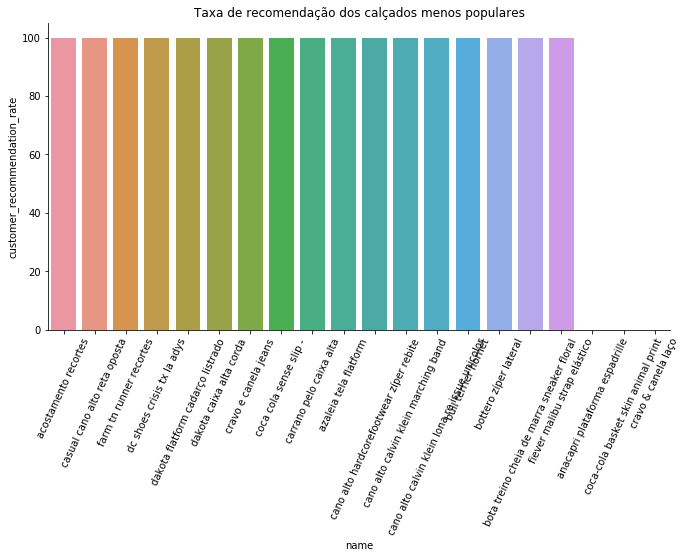

In [27]:
plot_ordered_by_y('name','customer_score',
                  groupby_name_score.nsmallest(20,'customer_reviews_number'),
                  rotation=65,title="Notas dos calçados menos populares")

plot_ordered_by_y('name','price',
                  groupby_name_score.nsmallest(20,'customer_reviews_number'),
                  rotation=65,title="Preços dos calçados menos populares")

plot_ordered_by_y('name','customer_recommendation_rate',
                  groupby_name_score.nsmallest(20,'customer_reviews_number'),
                  rotation=65,title="Taxa de recomendação dos calçados menos populares")

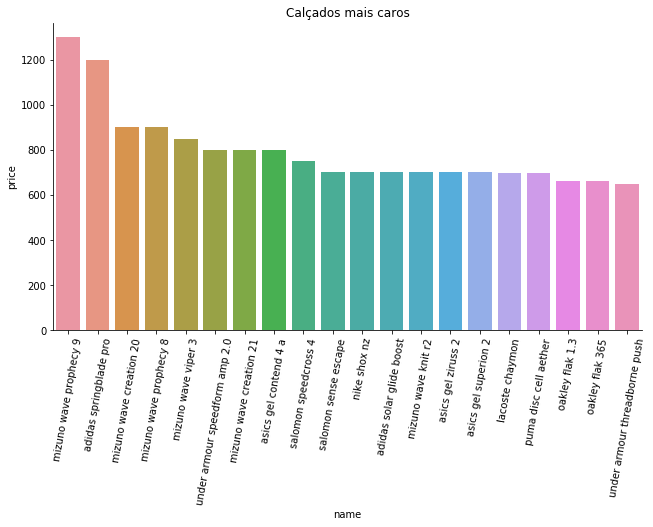

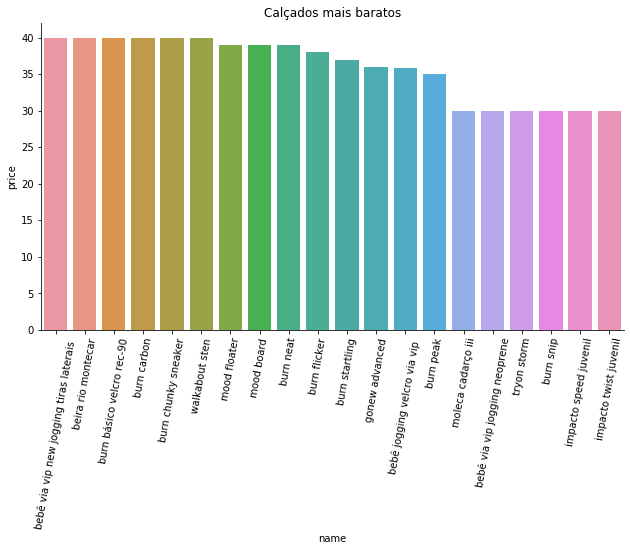

In [28]:
groupby_name_price_max = df_shoes.groupby(['name']).agg({'price' : 'max'}).reset_index()

plot_ordered_by_y('name','price',
                  groupby_name_price_max.nlargest(20,'price'),
                  rotation=80,title="Calçados mais caros")

groupby_name_price_min = df_shoes.groupby(['name']).agg({'price' : 'min'}).reset_index()

plot_ordered_by_y('name','price',
                   groupby_name_price_min.nsmallest(20,'price'),
                   rotation=80,title="Calçados mais baratos")

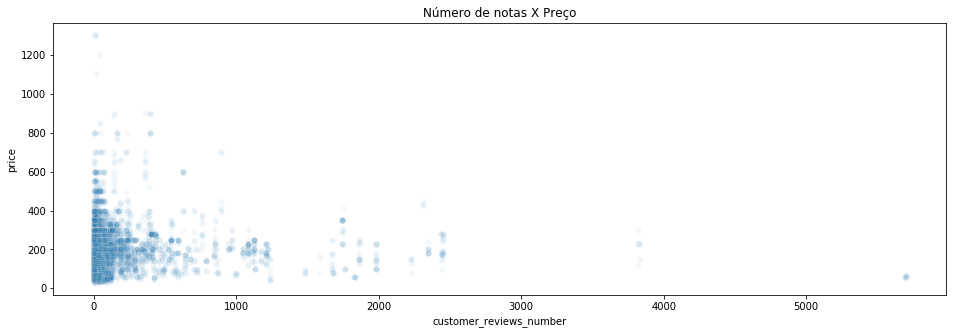

In [29]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='customer_reviews_number', 
                y='price', 
                data=df_shoes[df_shoes['customer_reviews_number'] > 
                              df_shoes['customer_reviews_number'].quantile(0.1)],
               alpha=0.05)
plt.title("Número de notas X Preço")
plt.show()

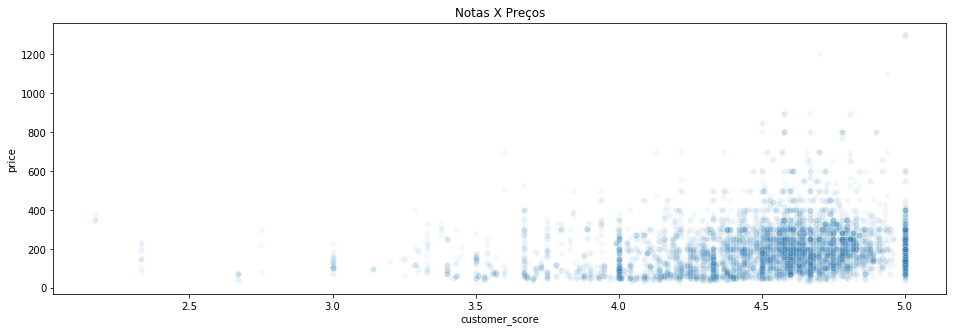

In [30]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='customer_score', 
                y='price', 
                data=df_shoes[df_shoes['customer_reviews_number'] > 
                              df_shoes['customer_reviews_number'].quantile(0.1)],
               alpha=0.05)
plt.title("Notas X Preços")
plt.show()

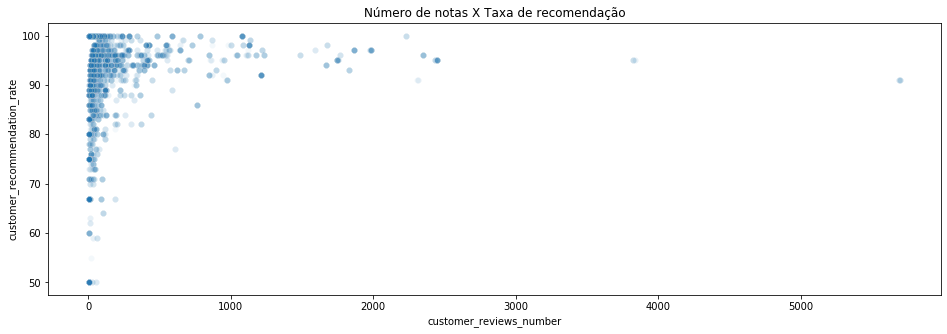

In [31]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='customer_reviews_number', 
                y='customer_recommendation_rate', 
                data=df_shoes[df_shoes['customer_reviews_number'] > 
                              df_shoes['customer_reviews_number'].quantile(0.1)],
               alpha=0.05)
plt.title("Número de notas X Taxa de recomendação")
plt.show()

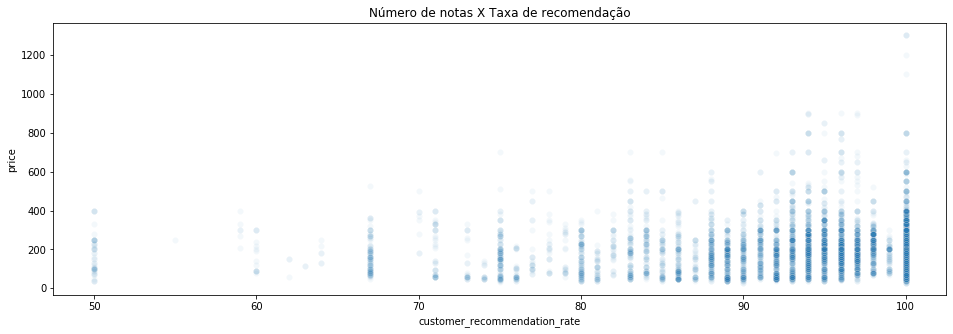

In [32]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='customer_recommendation_rate', 
                y='price', 
                data=df_shoes[df_shoes['customer_reviews_number'] > 
                              df_shoes['customer_reviews_number'].quantile(0.1)],
               alpha=0.05)
plt.title("Número de notas X Taxa de recomendação")
plt.show()

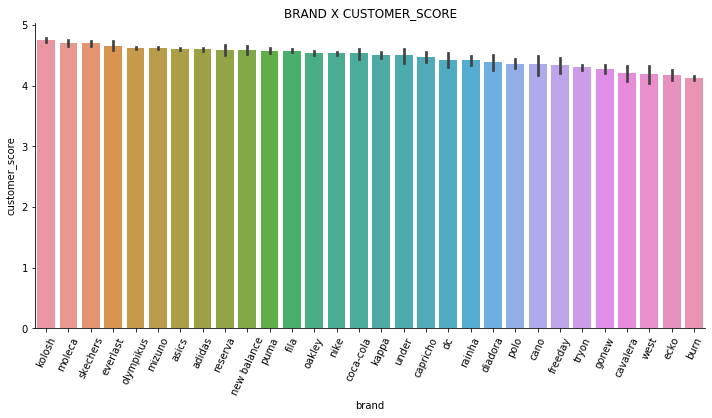

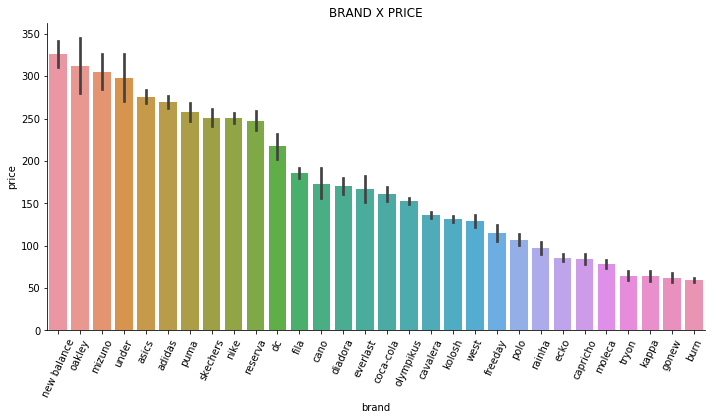

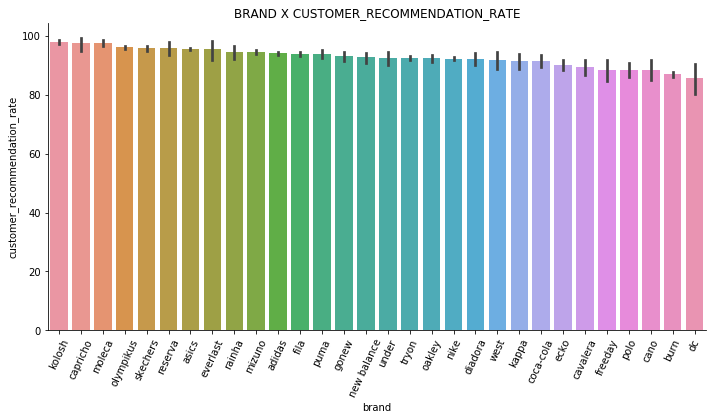

In [33]:
plot_ordered_by_y('brand','customer_score',
                  df_shoes[df_shoes['brand'].isin(largest_brands.index) &
                           (df_shoes['customer_reviews_number'] >
                            df_shoes['customer_reviews_number'].quantile(0.1))],
                  rotation=65)

plot_ordered_by_y('brand','price',
                   df_shoes[df_shoes['brand'].isin(largest_brands.index)],
                   rotation=65)

plot_ordered_by_y('brand','customer_recommendation_rate',
                  df_shoes[df_shoes['brand'].isin(largest_brands.index) &
                           (df_shoes['customer_reviews_number'] >
                            df_shoes['customer_reviews_number'].quantile(0.1))],
                  rotation=65)

# Análise Multivariada

In [34]:
groupby_name_price = df_shoes.groupby(['brand','name']).agg({'price' : 'mean'}).reset_index()
groupby_name_price['price'] = np.round(groupby_name_price['price'],2)

for brand in largest_brands.index:
    print("\nMarca: ",brand)
    print("\n  Calçados mais caros: ")
    display(groupby_name_price[groupby_name_price['brand']== brand].nlargest(5,'price'))
        
    print("\n  Calçados mais baratos: ")
    display(groupby_name_price[groupby_name_price['brand']== brand].nsmallest(5,'price'))


Marca:  nike

  Calçados mais caros: 


,brand,name,price
1086,nike,nike metcon 5,599.99
1071,nike,nike free metcon 2,514.26
1109,nike,nike shox nz,510.82
1025,nike,nike air max alpha savage,499.99
1110,nike,nike shox nz eu,436.66



  Calçados mais baratos: 


,brand,name,price
1020,nike,nike - treino,129.99
1098,nike,nike revolution 4,155.24
1053,nike,nike dart 12 msl,161.57
1041,nike,nike benassi slp,169.99
1050,nike,nike court royale suede,173.32



Marca:  asics

  Calçados mais caros: 


,brand,name,price
198,asics,asics gel superion 2,629.95
201,asics,asics gel ziruss 2,563.26
214,asics,asics gel-quantum 180 4,529.10
219,asics,asics gel-solution speed,523.29
192,asics,asics gel quantum 360 5,513.74



  Calçados mais baratos: 


,brand,name,price
240,asics,asics tiger lyte-trainer,163.32
233,asics,asics raiden,166.56
157,asics,asics blocker,167.69
158,asics,asics classic ct,169.99
236,asics,asics tarash,172.55



Marca:  olympikus

  Calçados mais caros: 


,brand,name,price
1278,olympikus,olympikus victory,309.97
1154,olympikus,olympikus alpha,304.94
1215,olympikus,olympikus horizon,299.90
1210,olympikus,olympikus guide,249.90
1171,olympikus,olympikus cosmos,242.42



  Calçados mais baratos: 


,brand,name,price
1214,olympikus,olympikus hobby,72.39
1228,olympikus,olympikus liberty 2,74.99
1150,olympikus,extra olympikus,79.99
1227,olympikus,olympikus libert,79.99
1237,olympikus,olympikus mystic,79.99



Marca:  adidas

  Calçados mais caros: 


,brand,name,price
119,adidas,adidas springblade pro,675.61
36,adidas,adidas cc sonic bounce,629.90
126,adidas,adidas terrex swift r2,509.94
115,adidas,adidas solar glide boost,433.69
113,adidas,adidas solar drive,421.63



  Calçados mais baratos: 


,brand,name,price
53,adidas,adidas duramo lite 2,129.99
74,adidas,adidas lite racer,129.99
55,adidas,adidas duramo lite 20,136.66
99,adidas,adidas refine adapt,139.99
108,adidas,adidas runfalcon,159.99



Marca:  fila

  Calçados mais caros: 


,brand,name,price
617,fila,fila disruptor ii premium,499.99
688,fila,fila speed trail,364.94
614,fila,fila d-formation,349.90
651,fila,fila fxt pro,319.94
674,fila,fila overtech,309.94



  Calçados mais baratos: 


,brand,name,price
704,fila,fila versatile,93.32
631,fila,fila f-55,99.99
647,fila,fila fresh,103.32
605,fila,fila allure,106.66
692,fila,fila stride,116.60



Marca:  mizuno

  Calçados mais caros: 


,brand,name,price
938,mizuno,mizuno wave prophecy 9,1299.99
937,mizuno,mizuno wave prophecy 8,816.41
921,mizuno,mizuno wave creation 21,799.99
942,mizuno,mizuno wave viper 3,699.94
920,mizuno,mizuno wave creation 20,674.88



  Calçados mais baratos: 


,brand,name,price
902,mizuno,mizuno ezrun 2,143.32
901,mizuno,mizuno ez flex n,149.99
900,mizuno,mizuno ez flex 2,151.79
894,mizuno,mizuno atlas,153.99
899,mizuno,mizuno ez flex,156.59



Marca:  skechers

  Calçados mais caros: 


,brand,name,price
1510,skechers,skechers go run 7,547.47
1540,skechers,skechers horizon,417.99
1541,skechers,skechers pure,406.66
1508,skechers,skechers go run 6,385.64
1516,skechers,skechers go run vortex,379.99



  Calçados mais baratos: 


,brand,name,price
1562,skechers,skechers vaso - vivir,112.49
1564,skechers,skechers you,112.50
1545,skechers,skechers side street glitz kickz,126.66
1496,skechers,skechers dynamight blissful,127.49
1509,skechers,skechers go run 600 control,132.29



Marca:  burn

  Calçados mais caros: 


,brand,name,price
306,burn,burn life,79.99
314,burn,burn peony,79.99
325,burn,burn startling,75.36
292,burn,burn bulder,73.34
297,burn,burn crater,71.24



  Calçados mais baratos: 


,brand,name,price
302,burn,burn fox,39.99
327,burn,burn tunnel,39.99
299,burn,burn erebus,49.99
307,burn,burn limited,49.99
312,burn,burn noble,49.99



Marca:  puma

  Calçados mais caros: 


,brand,name,price
1340,puma,puma disc cell aether,583.85
1351,puma,puma hybrid rocket runner wns,472.94
1352,puma,puma hybrid sky,455.94
1346,puma,puma ferrari speed hybrid,399.99
1374,puma,puma speed hybrid,399.99



  Calçados mais baratos: 


,brand,name,price
1326,puma,juvenil puma activate ac,135.93
1373,puma,puma smash wns v2 sd bdp,139.99
1375,puma,puma st activate,165.95
1370,puma,puma smash ace,169.99
1328,puma,puma adela core,179.99



Marca:  cavalera

  Calçados mais caros: 


,brand,name,price
401,cavalera,cavalera dany croco,219.99
431,cavalera,cavalera toby,199.90
424,cavalera,cavalera pedro lona,176.60
413,cavalera,cavalera klaus,172.49
408,cavalera,cavalera isabela,169.99



  Calçados mais baratos: 


,brand,name,price
419,cavalera,cavalera matelassê,89.99
389,cavalera,cavalera alicia montecar,102.70
396,cavalera,cavalera cano alto rodrigo,109.99
397,cavalera,cavalera carol,109.99
398,cavalera,cavalera cesar,109.99



Marca:  kolosh

  Calçados mais caros: 


,brand,name,price
826,kolosh,kolosh elástico apliques laterais,166.61
813,kolosh,kolosh anabela velcros,162.49
811,kolosh,kolosh anabela matelassê,159.99
817,kolosh,kolosh cadarço elástico 3 strass,154.99
842,kolosh,kolosh zíper lateral laser,151.92



  Calçados mais baratos: 


,brand,name,price
815,kolosh,kolosh cadarço,75.95
820,kolosh,kolosh cadarço velcro,99.97
824,kolosh,kolosh cravinhos,99.99
836,kolosh,kolosh tela perfuros,109.93
835,kolosh,kolosh strass,110.69



Marca:  ecko

  Calçados mais caros: 


,brand,name,price
547,ecko,ecko nically,179.99
552,ecko,ecko nt3507,169.99
550,ecko,ecko nt10601,103.32
549,ecko,ecko nt10600,99.99
551,ecko,ecko nt10602,99.99



  Calçados mais baratos: 


,brand,name,price
557,ecko,ecko sound,56.79
545,ecko,ecko marshall,59.99
540,ecko,ecko court,67.42
539,ecko,ecko comfort,67.49
542,ecko,ecko heritage,69.99



Marca:  polo

  Calçados mais caros: 


,brand,name,price
1314,polo,polo royal montecar bicolor,186.90
1307,polo,polo royal flex,171.24
1316,polo,polo royal montecar faixa lateral,146.68
1323,polo,polo royal scott,139.94
1325,polo,polo royal venzo,137.94



  Calçados mais baratos: 


,brand,name,price
1297,polo,polo energy casual,54.90
1318,polo,polo royal montecar premium,69.99
1312,polo,polo royal miura,86.66
1300,polo,polo royal brs,89.34
1301,polo,polo royal caiene,89.99



Marca:  new balance

  Calçados mais caros: 


,brand,name,price
1012,new balance,new balance ws247 ii,499.90
1011,new balance,new balance ws247 i,429.90
989,new balance,new balance 247v2,399.99
999,new balance,new balance 997h,399.99
1008,new balance,new balance ms247,398.28



  Calçados mais baratos: 


,brand,name,price
1000,new balance,new balance arish,179.99
993,new balance,new balance 411,183.32
1001,new balance,new balance coast v4 lg4,189.99
1010,new balance,new balance wrl247 i,229.99
990,new balance,new balance 373,268.37



Marca:  diadora

  Calçados mais caros: 


,brand,name,price
528,diadora,diadora stream,249.99
518,diadora,diadora level,242.99
515,diadora,diadora hexa,242.04
519,diadora,diadora master,231.15
511,diadora,diadora even,215.92



  Calçados mais baratos: 


,brand,name,price
517,diadora,diadora legacy,79.99
512,diadora,diadora flex,91.20
509,diadora,diadora easy go,119.22
510,diadora,diadora easy run 2,119.99
524,diadora,diadora skipe,127.13



Marca:  tryon

  Calçados mais caros: 


,brand,name,price
1595,tryon,tryon quick,171.99
1591,tryon,tryon halo,70.08
1596,tryon,tryon sense,65.16
1589,tryon,tryon blend,59.99
1600,tryon,tryon twist,59.99



  Calçados mais baratos: 


,brand,name,price
1593,tryon,tryon meru,49.99
1597,tryon,tryon storm,51.99
1602,tryon,tryon wazn,52.49
1592,tryon,tryon lark,54.99
1598,tryon,tryon taos,54.99



Marca:  cano

  Calçados mais caros: 


,brand,name,price
343,cano,cano alto calvin klein lona cupped,309.99
356,cano,cano alto hardcorefootwear ii,303.26
355,cano,cano alto hardcorefootwear acolchoado,292.74
371,cano,cano médio reserva,291.57
344,cano,cano alto calvin klein lona re issue unicolor,271.90



  Calçados mais baratos: 


,brand,name,price
346,cano,cano alto capricho ginger strass,49.99
361,cano,cano alto walkabout broken rules,69.99
362,cano,cano alto walkabout moscou,69.99
363,cano,cano alto walkabout perfuros,69.99
366,cano,cano curto walkabout midnight,69.99



Marca:  oakley

  Calçados mais caros: 


,brand,name,price
1134,oakley,oakley flak 365,626.97
1133,oakley,oakley flak 1.3,509.82
1135,oakley,oakley halftrack low,504.92
1147,oakley,oakley turbine,477.47
1146,oakley,oakley stride 2.0,429.96



  Calçados mais baratos: 


,brand,name,price
1148,oakley,oakley two barrel 4.0,119.99
1138,oakley,oakley liv,158.31
1142,oakley,oakley split,159.99
1143,oakley,oakley step,164.97
1136,oakley,oakley icon,194.13



Marca:  reserva

  Calçados mais caros: 


,brand,name,price
1432,reserva,reserva rsv188col,369.92
1438,reserva,reserva solado tratorado,344.90
1439,reserva,reserva solado tratorado #neo188,320.59
1435,reserva,reserva rsv209,279.99
1429,reserva,reserva mesclado vamo que vamo,272.40



  Calçados mais baratos: 


,brand,name,price
1428,reserva,reserva lona ponteira borracha,182.49
1434,reserva,reserva rsv198new,199.90
1430,reserva,reserva rsv008csl,199.99
1436,reserva,reserva rsv212,209.94
1433,reserva,reserva rsv190,213.23



Marca:  coca-cola

  Calçados mais caros: 


,brand,name,price
454,coca-cola,coca-cola sense cetim,199.93
444,coca-cola,coca-cola basket floater plataforma,199.92
453,coca-cola,coca-cola sense,184.53
452,coca-cola,coca-cola ruby suede,179.93
447,coca-cola,coca-cola basket suede,179.60



  Calçados mais baratos: 


,brand,name,price
451,coca-cola,coca-cola kick ease,69.99
456,coca-cola,coca-cola sense skin animal print,99.99
457,coca-cola,coca-cola united,129.99
442,coca-cola,coca-cola appolo canvas,136.66
445,coca-cola,coca-cola basket link,139.99



Marca:  rainha

  Calçados mais caros: 


,brand,name,price
1407,rainha,rainha rocket,159.99
1396,rainha,rainha brave,157.49
1401,rainha,rainha forrest,139.99
1410,rainha,rainha soul,119.93
1409,rainha,rainha sky,119.90



  Calçados mais baratos: 


,brand,name,price
1402,rainha,rainha hope,59.99
1397,rainha,rainha chase,67.12
1406,rainha,rainha reaction ii,67.49
1395,rainha,rainha balance,69.99
1414,rainha,rainha vl 2500,84.75



Marca:  moleca

  Calçados mais caros: 


,brand,name,price
952,moleca,moleca caixa alta,129.93
962,moleca,moleca sola glitter,113.23
957,moleca,moleca jogging perfuros,93.26
948,moleca,moleca aplique strass sardenha neo,89.88
954,moleca,moleca caixa alta detalhe lateral,87.44



  Calçados mais baratos: 


,brand,name,price
951,moleca,moleca cadarço iii,53.16
955,moleca,moleca detalhe lateral,59.93
956,moleca,moleca furinhos,69.60
953,moleca,moleca caixa alta camurça,70.82
959,moleca,moleca matelassê,71.53



Marca:  freeday

  Calçados mais caros: 


,brand,name,price
725,freeday,freeday new joint,209.99
718,freeday,freeday gravity masculino,199.99
726,freeday,freeday one 54603,163.32
729,freeday,freeday subverso,149.99
728,freeday,freeday singular,139.99



  Calçados mais baratos: 


,brand,name,price
713,freeday,freeday acessible,69.99
723,freeday,freeday macba 300020e,83.99
724,freeday,freeday move,92.85
714,freeday,freeday cap,95.99
717,freeday,freeday flip vulc,99.99



Marca:  gonew

  Calçados mais caros: 


,brand,name,price
737,gonew,gonew attack,109.99
742,gonew,gonew energy,99.99
740,gonew,gonew cozy,89.90
743,gonew,gonew fast,79.32
747,gonew,gonew hive,76.66



  Calçados mais baratos: 


,brand,name,price
745,gonew,gonew frost,49.99
749,gonew,gonew persei,49.99
751,gonew,gonew taron,49.99
736,gonew,gonew aster,51.66
752,gonew,gonew victory,53.32



Marca:  kappa

  Calçados mais caros: 


,brand,name,price
783,kappa,kappa reaction,89.99
786,kappa,kappa roma 2016,89.99
778,kappa,kappa impact,68.11
785,kappa,kappa robust,61.99
780,kappa,kappa luster,59.99



  Calçados mais baratos: 


,brand,name,price
782,kappa,kappa piemonte,49.99
787,kappa,kappa sicília,49.99
779,kappa,kappa lombardia,51.66
781,kappa,kappa lácio,52.32
789,kappa,kappa vêneto,53.32



Marca:  under

  Calçados mais caros: 


,brand,name,price
1617,under,under armour speedform amp 2.0,584.99
1618,under,under armour threadborne push,464.99
1610,under,under armour charged odyssey,412.45
1614,under,under armour charged spread,362.82
1605,under,under armour architech 3di,339.99



  Calçados mais baratos: 


,brand,name,price
1615,under,under armour charged sprint,147.49
1611,under,under armour charged prospect,226.61
1609,under,under armour charged impulse,233.99
1613,under,under armour charged skyline,259.99
1606,under,under armour bandit 3 ombre,266.57



Marca:  west

  Calçados mais caros: 


,brand,name,price
1668,west,west coast estonado malibu,142.85
1672,west,west coast perfuros detalhe zíper malibu,136.66
1669,west,west coast malibu,136.32
1671,west,west coast modena,118.15
1673,west,west coast ravello,117.47



  Calçados mais baratos: 


,brand,name,price
1670,west,west coast milano,112.76
1673,west,west coast ravello,117.47
1671,west,west coast modena,118.15
1669,west,west coast malibu,136.32
1672,west,west coast perfuros detalhe zíper malibu,136.66



Marca:  dc

  Calçados mais caros: 


,brand,name,price
478,dc,dc shoes anvil la,298.28
480,dc,dc shoes crisis tx la adys,269.90
479,dc,dc shoes anvil tx la,264.90
484,dc,dc shoes heathrow la,256.66
485,dc,dc shoes heathrow prestige,249.99



  Calçados mais baratos: 


,brand,name,price
487,dc,dc shoes lynnfield,139.99
490,dc,dc shoes midway sn,149.99
482,dc,dc shoes hartferd,157.99
481,dc,dc shoes episo,162.22
483,dc,dc shoes heathrow imp,166.66



Marca:  capricho

  Calçados mais caros: 


,brand,name,price
379,capricho,capricho like colors,113.92
374,capricho,capricho intense suede,109.97
376,capricho,capricho lanai fun,88.32
375,capricho,capricho lanai canvas,84.40
380,capricho,capricho likes rainbow gang,79.99



  Calçados mais baratos: 


,brand,name,price
372,capricho,capricho control print,49.99
377,capricho,capricho lanai loop,49.99
382,capricho,capricho shake,54.99
373,capricho,capricho gummy glow,56.49
378,capricho,capricho lanai yarn,76.66



Marca:  everlast

  Calçados mais caros: 


,brand,name,price
576,everlast,everlast hunter,249.94
573,everlast,everlast fast iv,237.66
583,everlast,everlast orient,217.99
572,everlast,everlast fast iii,203.29
578,everlast,everlast intense,196.00



  Calçados mais baratos: 


,brand,name,price
582,everlast,everlast north,109.93
581,everlast,everlast neutron ll,122.96
580,everlast,everlast move,126.57
574,everlast,everlast flashlight,131.94
577,everlast,everlast hunter ii,133.20


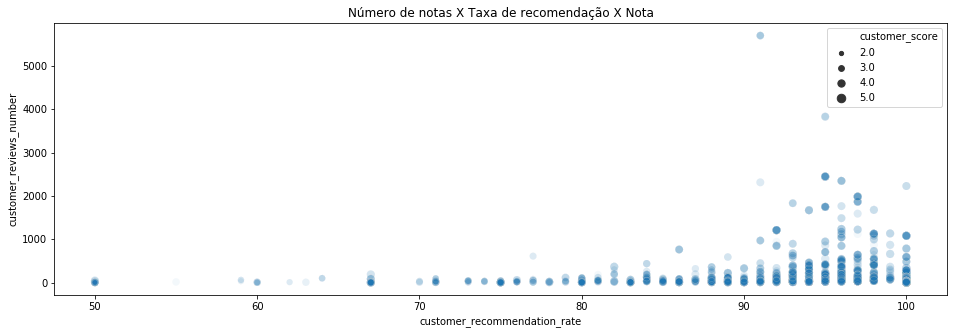

In [35]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='customer_recommendation_rate', 
                y='customer_reviews_number', 
                data=df_shoes[df_shoes['customer_reviews_number'] > 
                              df_shoes['customer_reviews_number'].quantile(0.1)],
                size='customer_score',
                alpha=0.05)
plt.title("Número de notas X Taxa de recomendação X Nota")
plt.show()

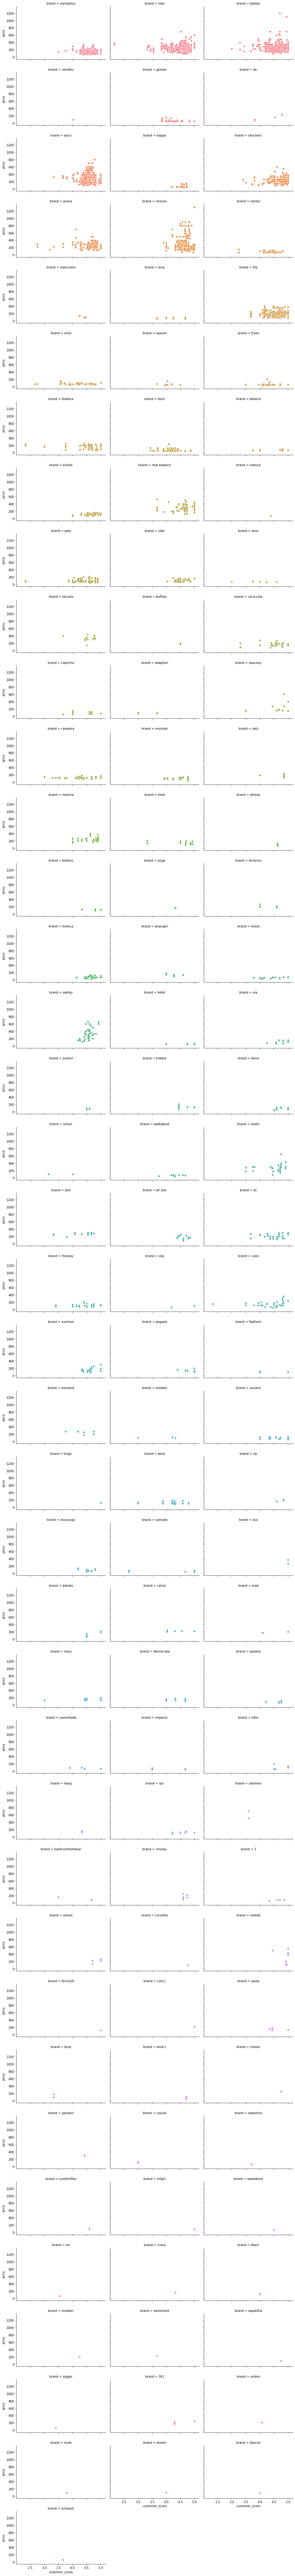

In [36]:
facets = sns.FacetGrid(col='brand',col_wrap=3,hue='brand',aspect=1.5,
                       data=df_shoes[df_shoes['customer_reviews_number'] > 
                       df_shoes['customer_reviews_number'].quantile(0.1)])

facets.map(sns.scatterplot,
           'customer_score',
           'price');

In [84]:
df_shoes.to_csv('post_analysis_shoes.csv',index=False)